In [33]:
%matplotlib inline
from modsim import *

earth = Condition(thickness = 14140,
                     surface_area = 5.099686589e+14,
                     density = 5510)
earth.radius = sqrt(earth.surface_area / (8 * np.pi))
earth.volume1 = earth.thickness * earth.radius** 2 * np.pi
earth.mass = earth.volume1 * earth.density
print(earth.radius)



baseball = Condition(x = earth.radius / 2, 
                      y = (earth.thickness/2) + 1,
                      ay = 9.8,
                      G = 6.67e-11,
                      mass = 145e-3,
                      diameter = 73e-3,
                      rho = 1.2,
                      C_d = 0.3,
                      angle = -45,
                      velocity = 100,
                      duration = 25.1)

def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, G=G, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

def slope_func(state, t, system):
    x, y, vx, vy = state
    unpack(system)
    p = Vector(x, y)
    v = Vector(vx, vy)
    f_grav = p.hat() * (-G * earth.mass * mass / (p.mag**2))
    f_drag = -rho * v.mag * v * C_d * area / 2
    
    #print(f_grav)
    #print(f_grav.mag)
    
    a_grav = f_grav / mass
    a_drag = f_drag / mass
    a_y= Vector(0, -ay)
    
    a = a_grav + a_drag + a_y


    return vx, vy, a.x, a.y
    



4504554.16456


,x,y,vx,vy
0.000,2.252277e+06,7071.000000,70.710678,-70.710678
0.251,2.252294e+06,7054.026572,62.472244,-64.804063
0.502,2.252309e+06,7038.354690,55.833736,-60.262876
0.753,2.252322e+06,7023.692205,50.359732,-56.710608
1.004,2.252334e+06,7009.824489,45.759783,-53.895590
1.255,2.252345e+06,6996.589689,41.832769,-51.643095
1.506,2.252355e+06,6983.863155,38.435079,-49.827939
1.757,2.252364e+06,6971.547240,35.461479,-48.358032
2.008,2.252373e+06,6959.564379,32.833147,-47.164082
2.259,2.252381e+06,6947.852261,30.489923,-46.192940


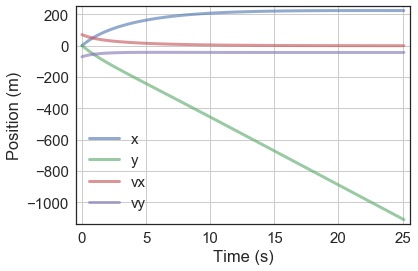

In [43]:
system = make_system(baseball)
slope_func(system.init, 0, system)


run_odeint(system, slope_func)

xs = system.results.x
ys = system.results.y

xv = system.results.vx
yv = system.results.vy

newfig()
plot(xs - (earth.radius / 2), label='x')
plot(ys - (earth.thickness / 2), label='y')
plot(xv, label='vx')
plot(yv, label='vy')
plt.grid()
decorate(xlabel='Time (s)',
         ylabel='Position (m)',)

system.results


<IPython.core.display.Javascript object>


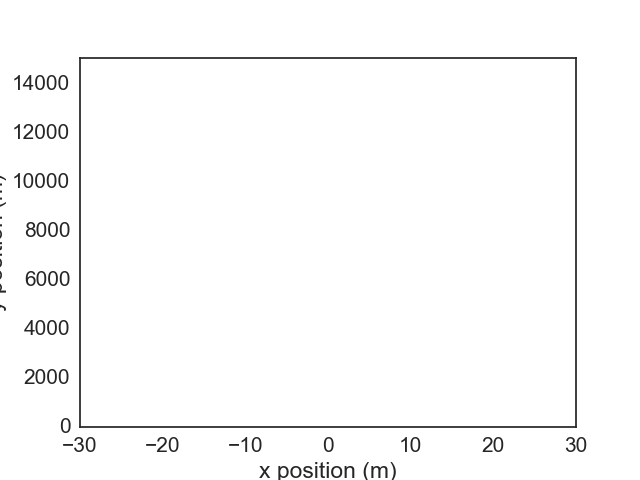

In [59]:


newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
         xlim=[-30, 30],
         ylim=[-50, 15000],
         legend=False)

for x, y in zip(system.results.x, system.results.y):
    plot(x, y, 'bo', update=True)
    sleep(0.01)